# House Price (Tehran, Iran) EDA
#### About 3500 Houses with thier complete information (Price in Dollor & Toman)
##### By @hoangvd, 13/06/2025

### 1. Init and clean data

- Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

- Import data, check for comlumns and variables

In [3]:
houses = pd.read_csv("./data/housePrice.csv")
houses.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
duplicates = houses.duplicated()
print(f"Duplicated: {duplicates.sum()}")
duplicated_rows = houses[duplicates]
print(duplicated_rows)

Duplicated: 208
     Area  Room  Parking  Warehouse  Elevator            Address  \
55     61     1     True       True     False              Punak   
78     74     2     True       True      True            Amirieh   
79     88     3    False      False      True             Parand   
80     63     1     True       True      True              Punak   
81    114     3     True       True      True         Sattarkhan   
...   ...   ...      ...        ...       ...                ...   
3449   80     2     True       True      True              Punak   
3451   88     2     True       True      True  Central Janatabad   
3459   80     2     True       True      True        Ostad Moein   
3461   55     1     True       True      True              Punak   
3476   75     2    False      False     False             Parand   

             Price  Price(USD)  
55    2.030000e+09    67666.67  
78    1.700000e+09    56666.67  
79    5.600000e+08    18666.67  
80    2.150000e+09    71666.67  
81

💡 **Insight 1**: Duplicate data  
Although there are duplicates, it's still normal and not an issue because a single building can be divided into multiple units and then sold separately (this can be used in relation to counting building density, location, and area).

Notes:
- **Area** in square meters
- **Number** of bedrooms
- Has **Parking** or not
- Has **elevator** or not
- Has **warehouse** or not
- The **region** where the house is placed
- **Price** in Toman and USD



- Since the price data in Toman and USD are essentially the same, just use USD to avoid confusion (remove the Toman price column).

In [5]:
houses.info()
houses = houses.drop('Price', axis=1)
houses = houses.rename(columns={'Price(USD)': 'Price'})
houses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33


💡 **Note**: Non-null count  
The data is mostly complete; however, some values in the "address" column are missing, possibly due to the absence of specific addresses or lack of provided information.

In [6]:
cate = ['Room', 'Parking', 'Warehouse', 'Elevator']

for i in cate:
    houses[i] = houses[i].astype('category')

houses['Area'] = pd.to_numeric(houses['Area'], errors='coerce')


houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Area       3473 non-null   float64 
 1   Room       3479 non-null   category
 2   Parking    3479 non-null   category
 3   Warehouse  3479 non-null   category
 4   Elevator   3479 non-null   category
 5   Address    3456 non-null   object  
 6   Price      3479 non-null   float64 
dtypes: category(4), float64(2), object(1)
memory usage: 95.7+ KB


In [7]:
# delete na values in address column
houses = houses.dropna(subset=['Address'])



- Area distribution in dataset

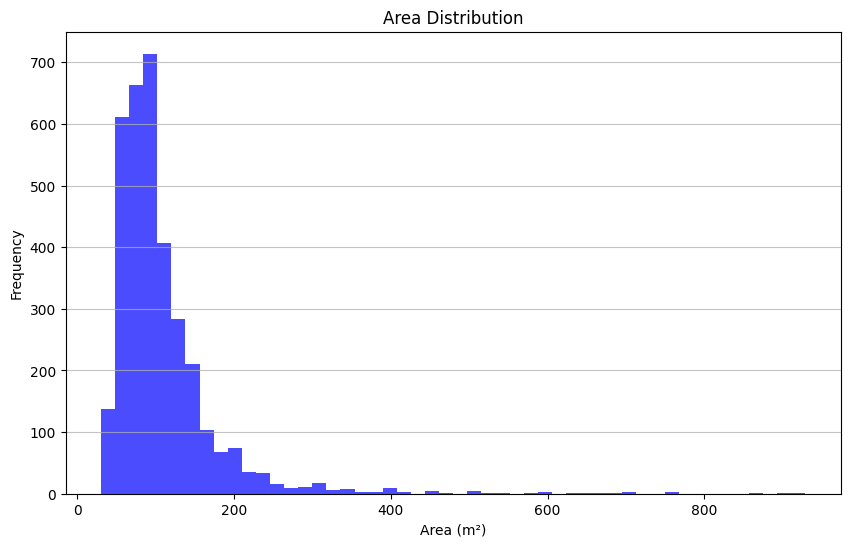

In [ ]:
houses['Area'].value_counts()
plt.figure(figsize=(10,6))
plt.hist(houses['Area'], bins=50, color='blue', alpha=0.7)
plt.title('Area Distribution')
plt.xlabel('Area (m²)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [1]:
area_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 500, 900]
houses['Area_Group'] = pd.cut(houses['Area'], bins=area_bins, labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-500', '500+'], right=False)
print(houses['Area_Group'].value_counts())


NameError: name 'pd' is not defined

- [0- ]

In [30]:
print(houses['Area'].describe().astype('float64'))

count    3450.000000
mean      106.917391
std        69.550976
min        30.000000
25%        69.000000
50%        90.000000
75%       120.000000
max       929.000000
Name: Area, dtype: float64


In [19]:
print(houses.Price.describe().astype(int))

count       3456
mean      179331
std       270724
min          120
25%        47333
50%        96666
75%       200000
max      3080000
Name: Price, dtype: int64


|